In [1]:
# Librerías para análisis y visualización

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Escalado y clustering

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster, cophenet
from scipy.spatial.distance import pdist

In [3]:
# Cargar el dataset

df = pd.read_csv("E:/UNAD/UNAD 2025/PRIMER SEMESTRE/ANALISIS DE DATOS/Tarea 4/Mall_Customers.csv")

In [5]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [9]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [11]:
# Verificar valores faltantes
print("Valores nulos por columna:\n", df.isnull().sum())

Valores nulos por columna:
 CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


C:\Users\Juan Camilo Rojas\AppData\Local\Temp\ipykernel_12348\3181186433.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Gender', data=df, palette='pastel')


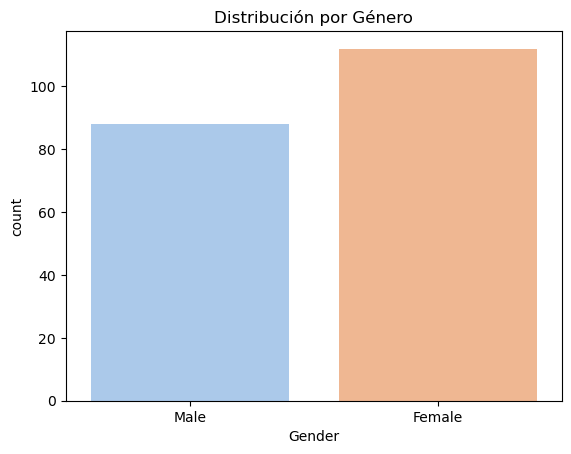

In [13]:
# Visualización: Distribución por género

sns.countplot(x='Gender', data=df, palette='pastel')
plt.title("Distribución por Género")
plt.show()

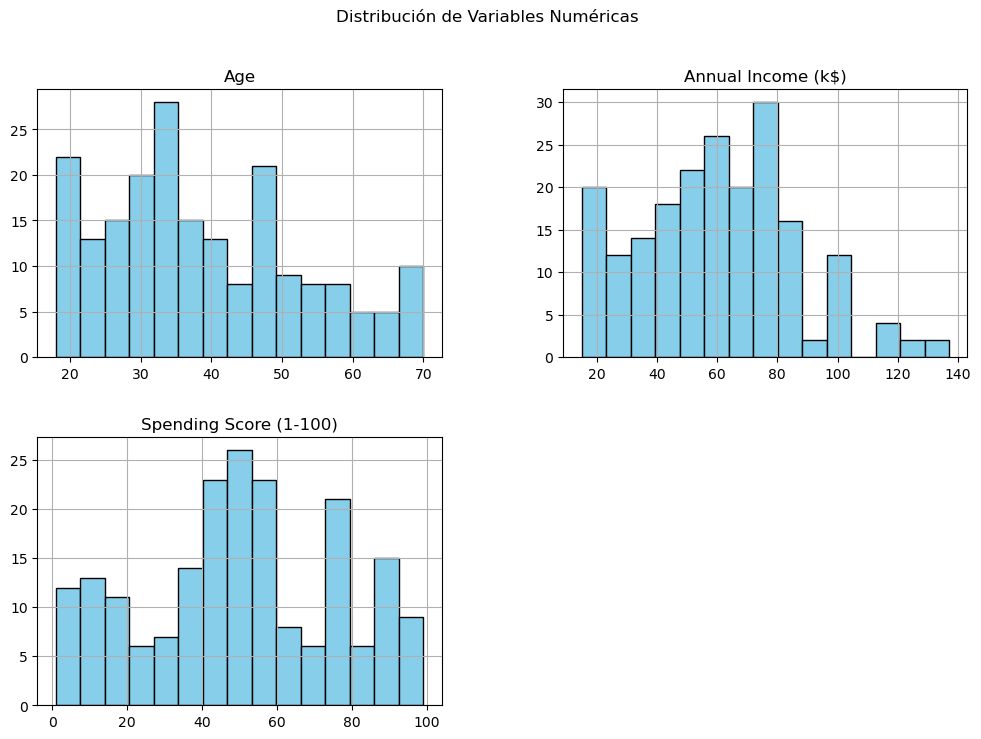

In [15]:
# Histogramas de variables numéricas

df.drop('CustomerID', axis=1).hist(bins=15, figsize=(12, 8), color='skyblue', edgecolor='black')
plt.suptitle("Distribución de Variables Numéricas")
plt.show()

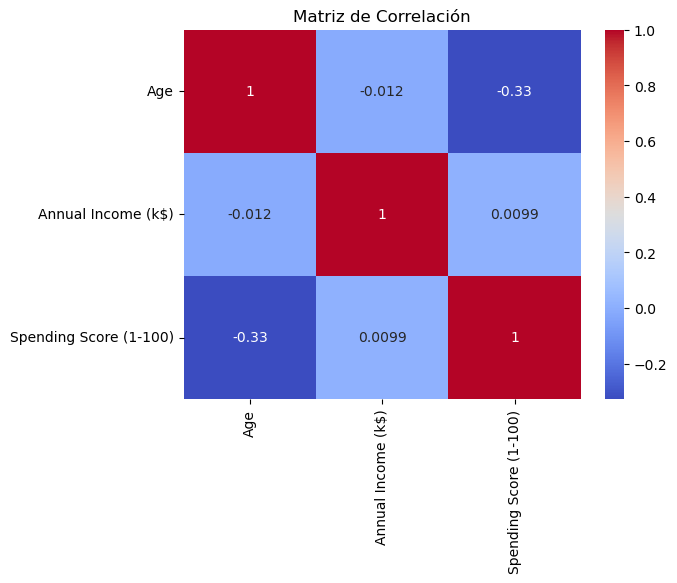

In [17]:
# Mapa de calor de correlación

sns.heatmap(df.drop('CustomerID', axis=1).corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Matriz de Correlación")
plt.show()

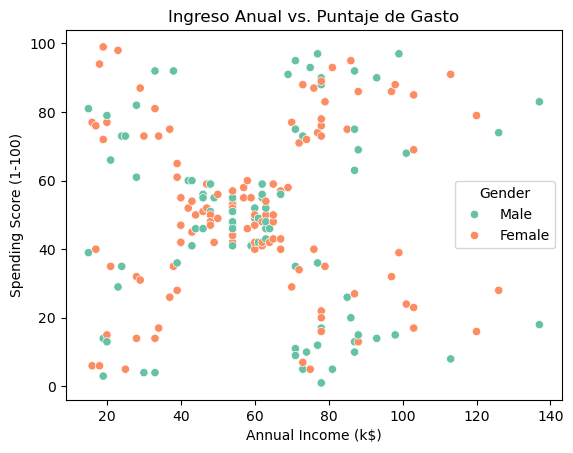

In [19]:
# Dispersión Ingreso vs Gasto

sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Gender', palette='Set2')
plt.title("Ingreso Anual vs. Puntaje de Gasto")
plt.show()

In [22]:
# Codificar la variable categórica Gender

df['Gender'] = LabelEncoder().fit_transform(df['Gender'])  # Male=1, Female=0

In [24]:
# Eliminar CustomerID

df_clustering = df.drop('CustomerID', axis=1)

In [26]:
# Escalar los datos

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_clustering)

Selección de características

In [29]:
# Seleccionamos solo ingreso y puntaje de gasto (lo más representativo para clustering)

X_selected = df[['Annual Income (k$)', 'Spending Score (1-100)']]
X_scaled_sel = scaler.fit_transform(X_selected)

Entrenamiento del modelo – K-Means

C:\Users\Juan Camilo Rojas\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Juan Camilo Rojas\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Juan Camilo Rojas\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Juan Camilo Rojas\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning:

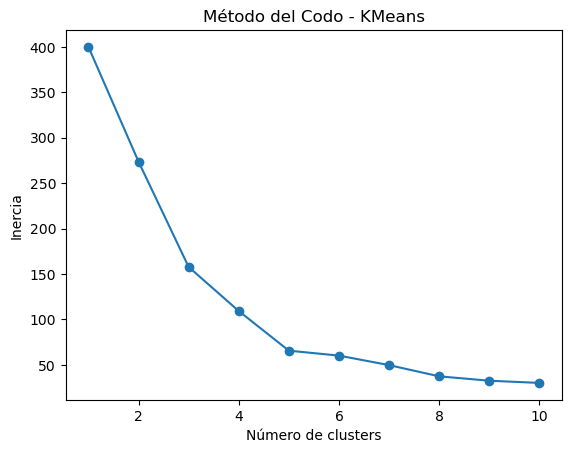

C:\Users\Juan Camilo Rojas\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [40]:
# Determinar número óptimo de clusters usando el método del codo

inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled_sel)
    inertia.append(kmeans.inertia_)

# Gráfico del método del codo
plt.plot(range(1, 11), inertia, marker='o')
plt.title("Método del Codo - KMeans")
plt.xlabel("Número de clusters")
plt.ylabel("Inercia")
plt.show()

# Entrenar modelo KMeans con k=5 (ejemplo)
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled_sel)

Evaluamos el modelo KMeans

In [43]:
print("Coeficiente de Silhouette:", silhouette_score(X_scaled_sel, kmeans_labels))
print("Índice de Calinski-Harabasz:", calinski_harabasz_score(X_scaled_sel, kmeans_labels))
print("Índice de Davies-Bouldin:", davies_bouldin_score(X_scaled_sel, kmeans_labels))

Coeficiente de Silhouette: 0.5546571631111091
Índice de Calinski-Harabasz: 248.64932001536357
Índice de Davies-Bouldin: 0.5722356162263352


Visualizamos el KMeans

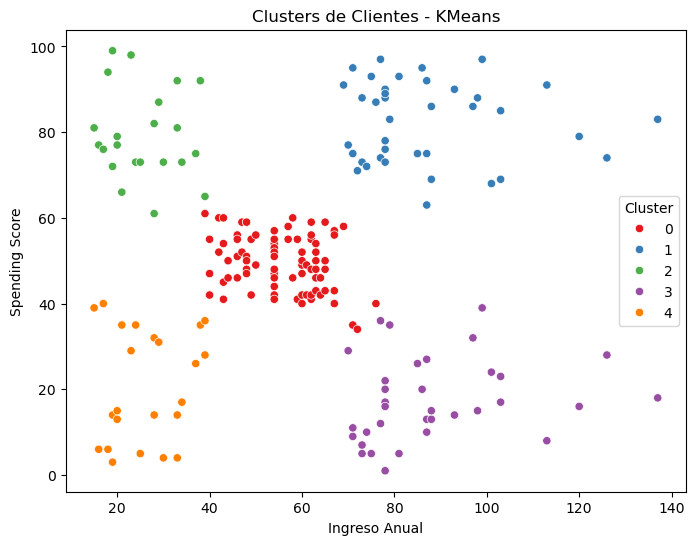

In [46]:
# Visualización de clusters

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_selected['Annual Income (k$)'], y=X_selected['Spending Score (1-100)'],
                hue=kmeans_labels, palette='Set1')
plt.title("Clusters de Clientes - KMeans")
plt.xlabel("Ingreso Anual")
plt.ylabel("Spending Score")
plt.legend(title='Cluster')
plt.show()

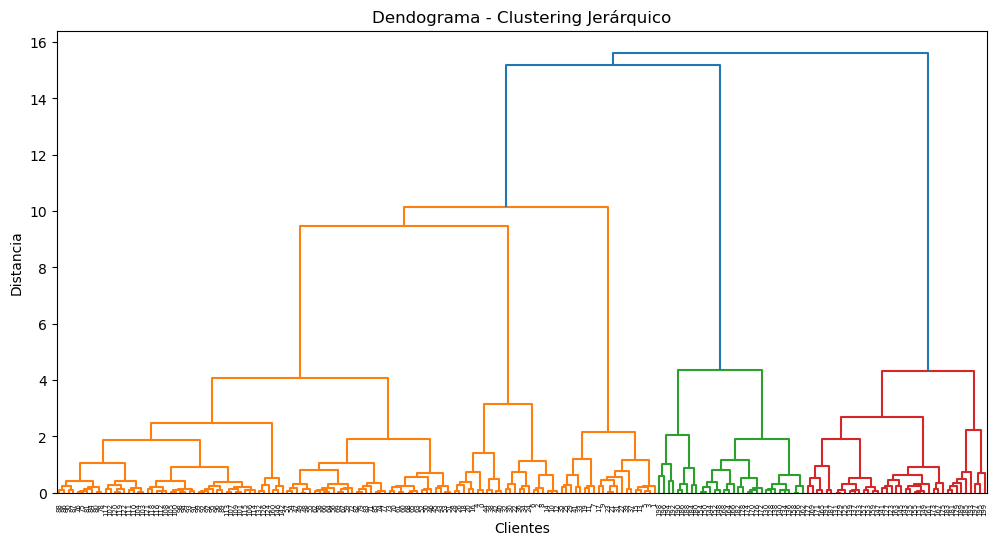

In [48]:
# Creacion del dendograma

linked = linkage(X_scaled_sel, method='ward')
plt.figure(figsize=(12, 6))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=False)
plt.title("Dendograma - Clustering Jerárquico")
plt.xlabel("Clientes")
plt.ylabel("Distancia")
plt.show()

In [50]:
# Modelo jerárquico con 5 clusters

hc = AgglomerativeClustering(n_clusters=5)
hc_labels = hc.fit_predict(X_scaled_sel)

Evaluación del modelo Jerárquico

In [53]:
print("Coeficiente de Silhouette:", silhouette_score(X_scaled_sel, hc_labels))
print("Índice de Calinski-Harabasz:", calinski_harabasz_score(X_scaled_sel, hc_labels))
print("Índice de Davies-Bouldin:", davies_bouldin_score(X_scaled_sel, hc_labels))

# Coeficiente de correlación cofenética

coph_corr, _ = cophenet(linked, pdist(X_scaled_sel))
print("Coeficiente de Correlación Cofenética:", coph_corr)

Coeficiente de Silhouette: 0.5538089226688662
Índice de Calinski-Harabasz: 244.41032586596822
Índice de Davies-Bouldin: 0.5778621190740154
Coeficiente de Correlación Cofenética: 0.7209128193077099


Visualización de clusters jerárquicos

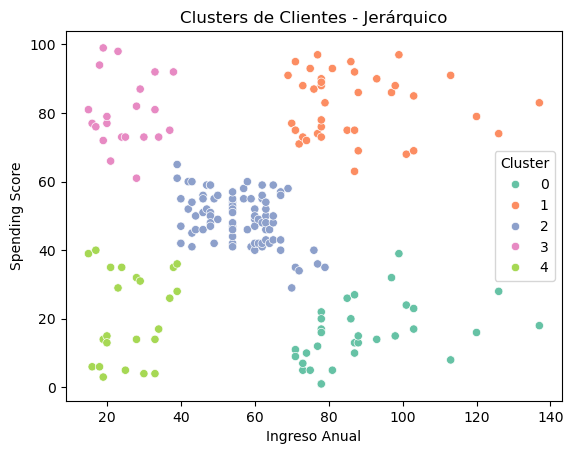

In [56]:
sns.scatterplot(x=X_selected['Annual Income (k$)'], y=X_selected['Spending Score (1-100)'],
                hue=hc_labels, palette='Set2')
plt.title("Clusters de Clientes - Jerárquico")
plt.xlabel("Ingreso Anual")
plt.ylabel("Spending Score")
plt.legend(title='Cluster')
plt.show()

Interpretacion

- Ambos modelos (K-Means y Jerárquico) identifican claramente grupos de clientes con diferentes niveles de ingreso y gasto.
- Los clientes con alto ingreso y alto gasto forman un grupo estratégico para campañas premium.
- El Coeficiente de Silhouette y el índice de Calinski-Harabasz sugieren que 5 clusters ofrecen una estructura coherente.
- K-means es más eficiente computacionalmente, mientras que el clustering jerárquico brinda una visión jerárquica útil al inicio.